With out Regulation

In [ ]:
import pandas as pd

In [ ]:
# Load the dataset
data = pd.read_excel("/content/Sales.xlsx")

In [ ]:
data

,TV Ad Spend (₹),Online Ad Spend (₹),Print Ad Spend (₹),Radio Ad Spend (₹),Outdoor Ad Spend (₹),Sales (₹)
0,50000,30000,20000,10000,15000,500000
1,60000,40000,25000,15000,20000,600000
2,70000,50000,30000,20000,25000,720000
3,40000,25000,15000,8000,10000,400000
4,80000,60000,35000,25000,30000,850000
5,55000,35000,22000,12000,18000,550000
6,65000,45000,28000,18000,22000,680000
7,75000,55000,32000,22000,27000,780000
8,45000,28000,18000,9000,12000,450000
9,85000,65000,38000,28000,32000,920000


In [ ]:
data.columns

Index(['TV Ad Spend (₹)', 'Online Ad Spend (₹)', 'Print Ad Spend (₹)',
       'Radio Ad Spend (₹)', 'Outdoor Ad Spend (₹)', 'Sales (₹)'],
      dtype='object')

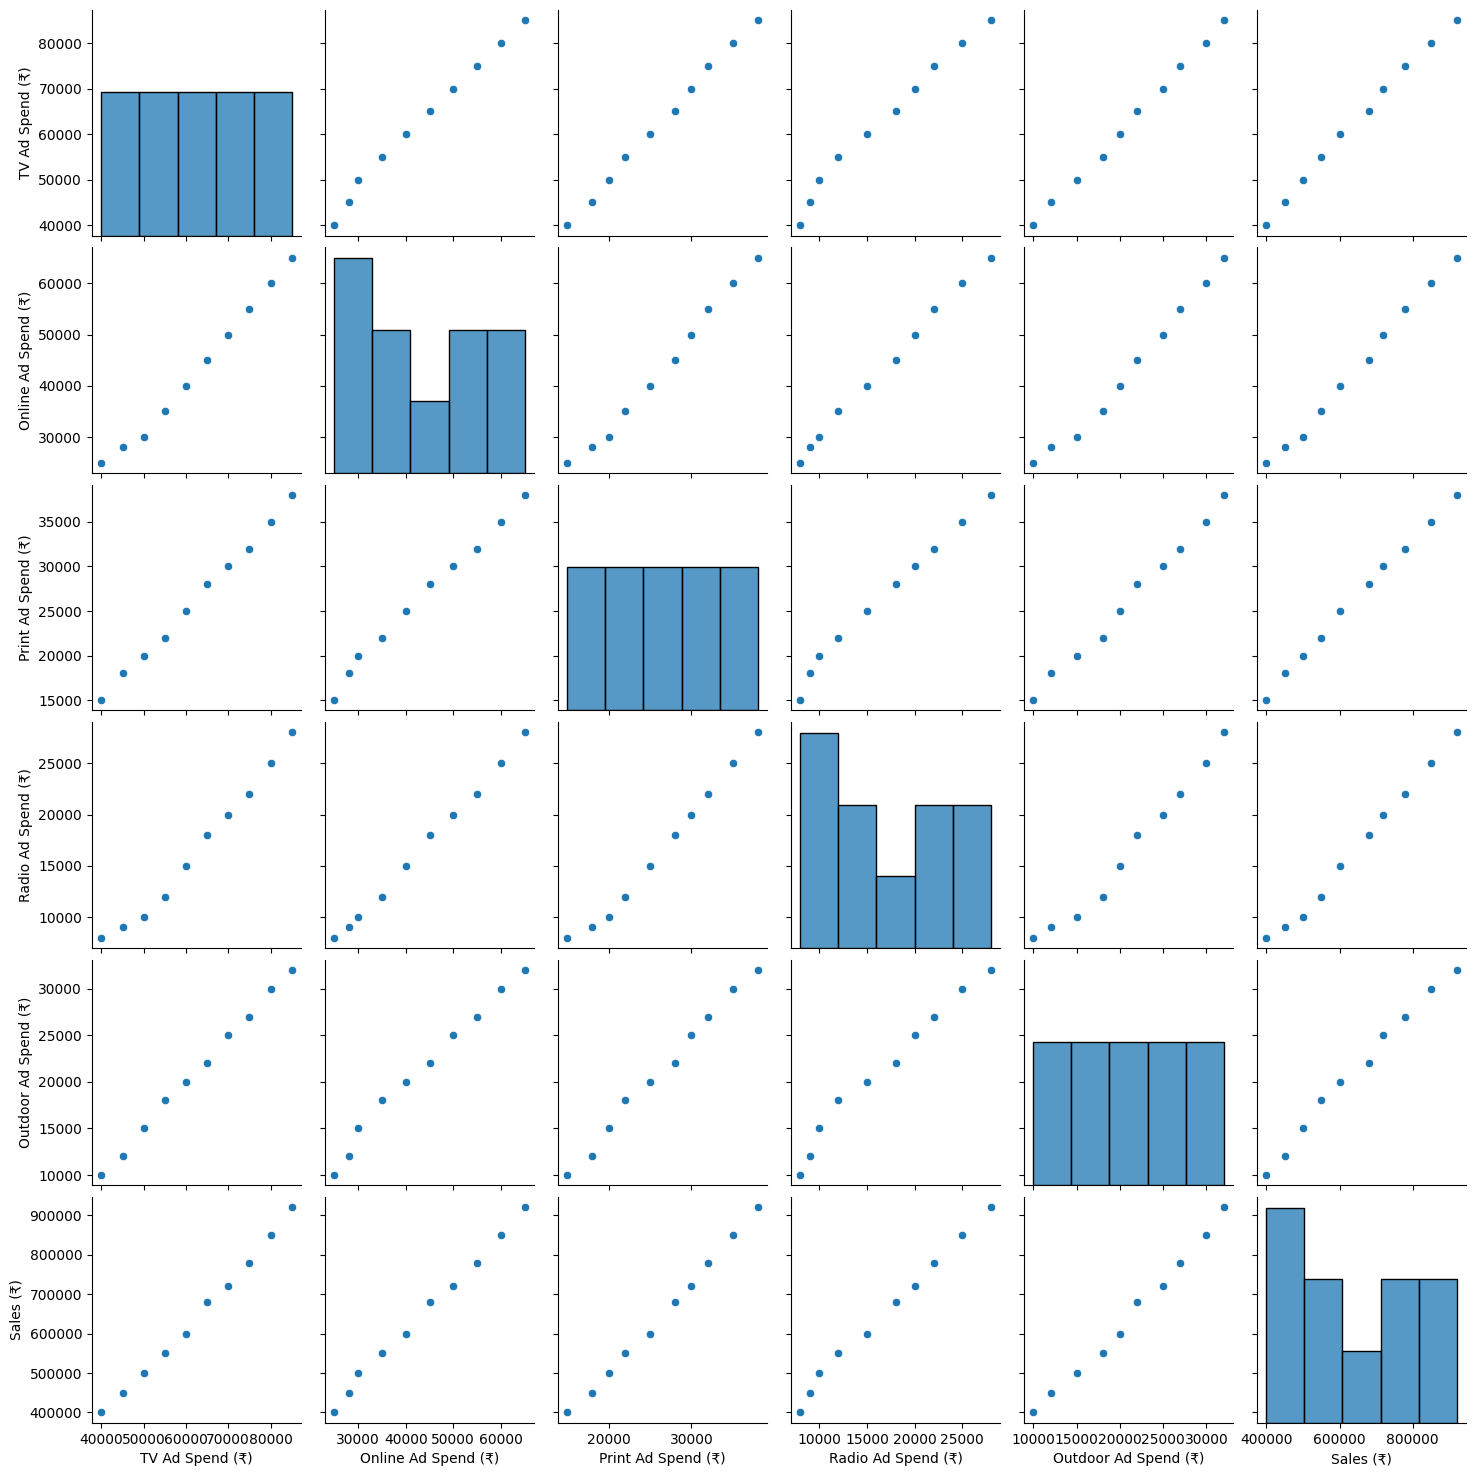

In [ ]:
import seaborn as sn
sn.pairplot(data)

In [ ]:
# Features and target
X = data[['TV Ad Spend (₹)', 'Online Ad Spend (₹)', 'Print Ad Spend (₹)', 'Radio Ad Spend (₹)', 'Outdoor Ad Spend (₹)']]
y = data["Sales (₹)"]

In [ ]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Linear Regression (no regularization)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Linear Regression Coefficients:", lr.coef_)

Linear Regression Coefficients: [ 4.82058824 -0.62058824 11.63235294  8.36764706 -5.        ]


In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = lr.predict(X_test)
mse_No_regulation = mean_squared_error(y_test, y_pred)
mse_No_regulation

85104913.49480934

L1 Regulation

In [ ]:
# Linear Regression (L1 regularization)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=10000)

lasso.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.758e+07, tolerance: 2.077e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=10000)

In [ ]:
print("Lasso Coefficients:", lasso.coef_)

Lasso Coefficients: [  9.42227539   1.40354614  11.0651829    5.02269524 -14.46198805]


In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = lasso.predict(X_test)
mse_L1_regulation = mean_squared_error(y_test, y_pred)
mse_L1_regulation

129776832.71697903

L2 Regulation Ridge

In [ ]:
# Linear Regression (L2 regularization)
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
print("Lasso Coefficients:", ridge.coef_)

Lasso Coefficients: [ 4.82058229 -0.62058668 11.6323446   8.36764528 -4.99998065]


In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = ridge.predict(X_test)
mse_L2_regulation = mean_squared_error(y_test, y_pred)
mse_L2_regulation

85104793.54359482

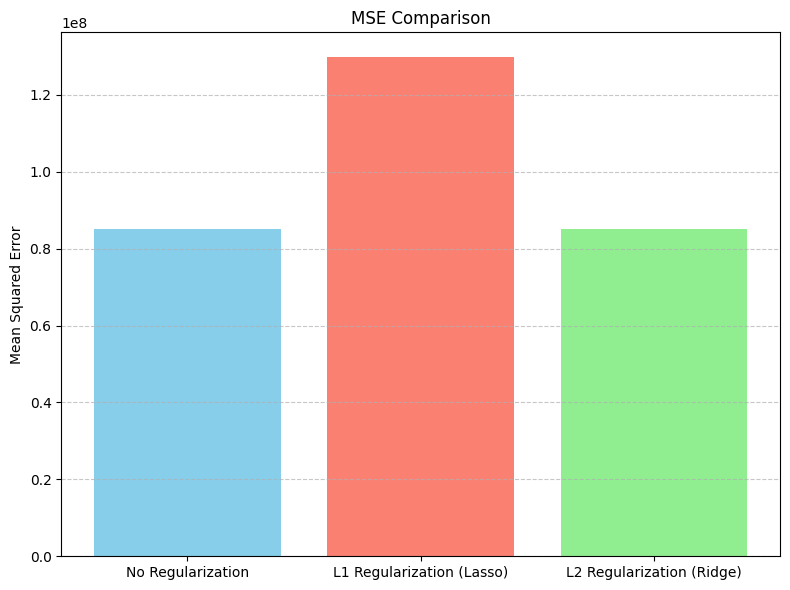

In [ ]:
import matplotlib.pyplot as plt

mse_values = {
    "No Regularization": mse_No_regulation,
    "L1 Regularization (Lasso)": mse_L1_regulation,
    "L2 Regularization (Ridge)": mse_L2_regulation
}

plt.figure(figsize=(8, 6))
plt.bar(mse_values.keys(), mse_values.values(), color=["skyblue", "salmon", "lightgreen"])
plt.title("MSE Comparison")
plt.ylabel("Mean Squared Error")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
